#  Importings necesarry libraries

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
 #warning
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [6]:
df = pd.read_csv(r'C:\BOOTCAMP\4. Unsupervised/Mall_Customers.csv')

In [8]:
print(f'SHape of Data : {df.shape}')

SHape of Data : (200, 5)


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

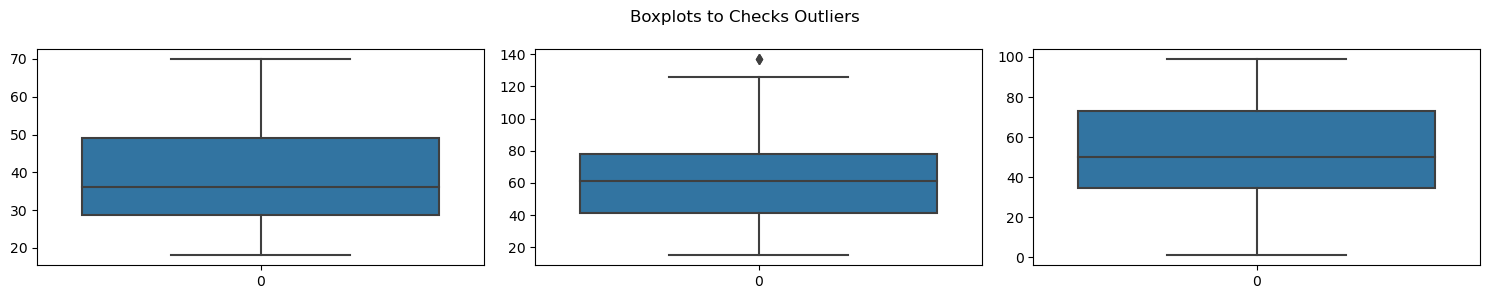

In [24]:
fig ,axs = plt.subplots(1,3,figsize=(15,3))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Checks Outliers')
plt.tight_layout()
plt.show()

# data visualization

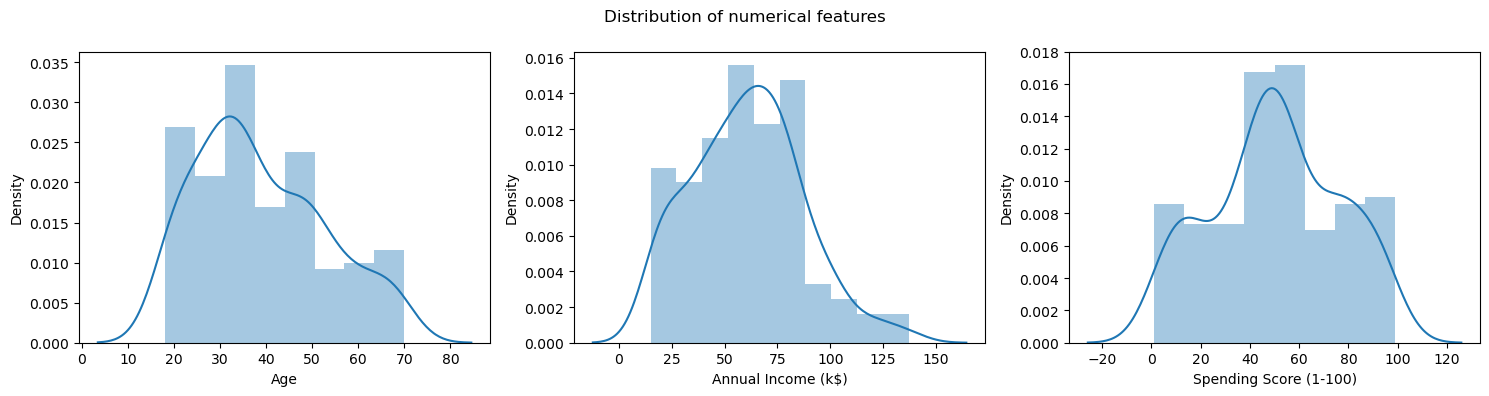

In [30]:
fig ,axs = plt.subplots(1,3,figsize=(15,4))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of numerical features')
plt.tight_layout()
plt.show()

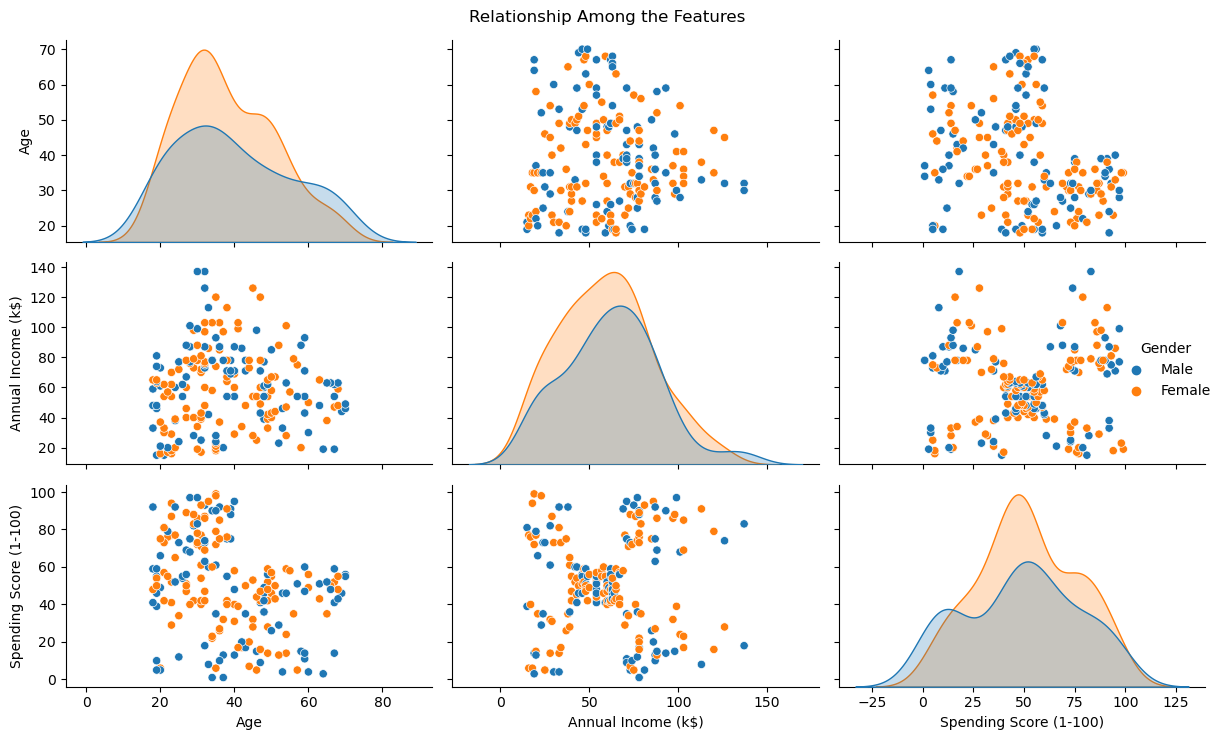

In [34]:
sns.pairplot(df.drop('CustomerID', axis = 1), hue = 'Gender', aspect = 1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

# Data Preprocessing

jika bukan ribuan data numeriknya(15.000) misal, tidak perlu scalling

In [53]:
#Features Selections
df_fs = df.drop(columns = 'CustomerID')

#Label Encoding
df_encoded = df_fs.replace({'Gender':{'Female':0,'Male':1}})

#features Scalling
#scaller = MinMaxScaler()
#X = scaller.fit_transform(df_encoded)
#X[:5,:]
X = df_encoded

# Modelling

# K-means Clustering

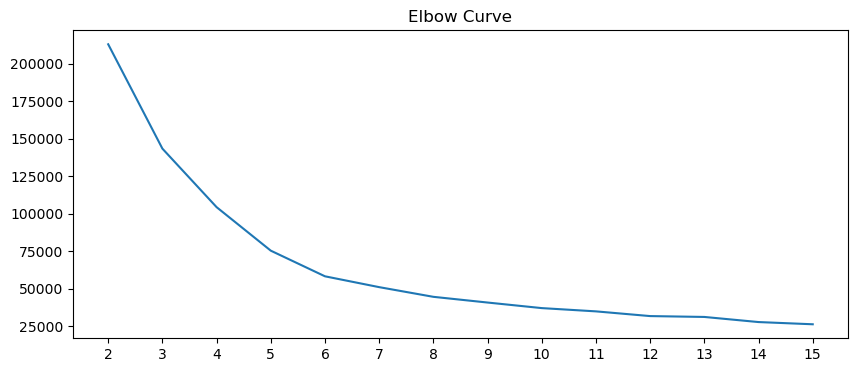

In [54]:
inertia = []
range_of_clusters = list(range(2,16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

In [55]:
# k-means dengan 4 cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


KMeans(n_clusters=4)

In [56]:
#labeling data
df_kmeans = df.copy()
df_kmeans['Clusters'] = kmeans.labels_
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


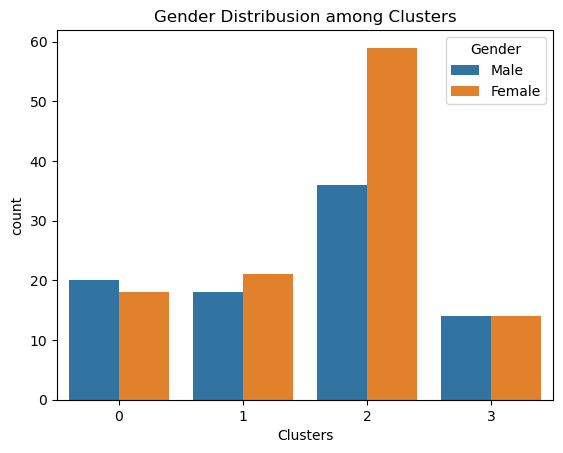

In [57]:
sns.countplot(data = df_kmeans, x = 'Clusters',hue ='Gender')
plt.title('Gender Distribusion among Clusters')
plt.show()

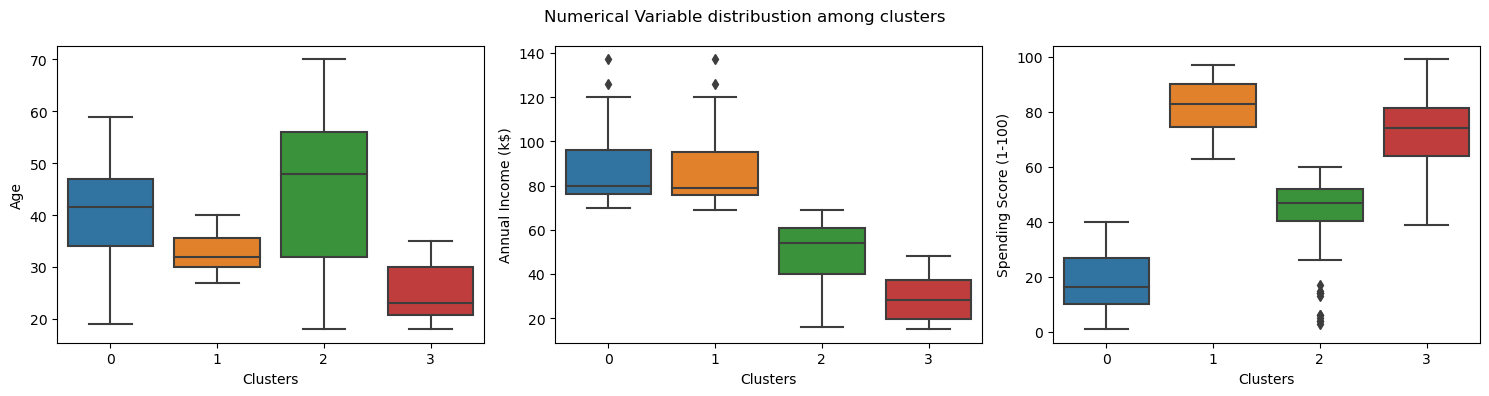

In [58]:
fig ,axs = plt.subplots(1,3,figsize=(15,4))
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x = 'Clusters',y = cols[i],ax = axs[i])
fig.suptitle('Numerical Variable distribustion among clusters')
plt.tight_layout()
plt.show()

cluster 0: high age wuth low spending score and high annual income<br>
culster 1 :high age with low spending score and high annual income<br>
clusters 2:low age with high spendscore and medium annual income<br>
clusters 3:low age with high spending score and low annual income

# Hierarchical Clustering

In [62]:
#features Scalling
scaller = MinMaxScaler()
X = scaller.fit_transform(X)


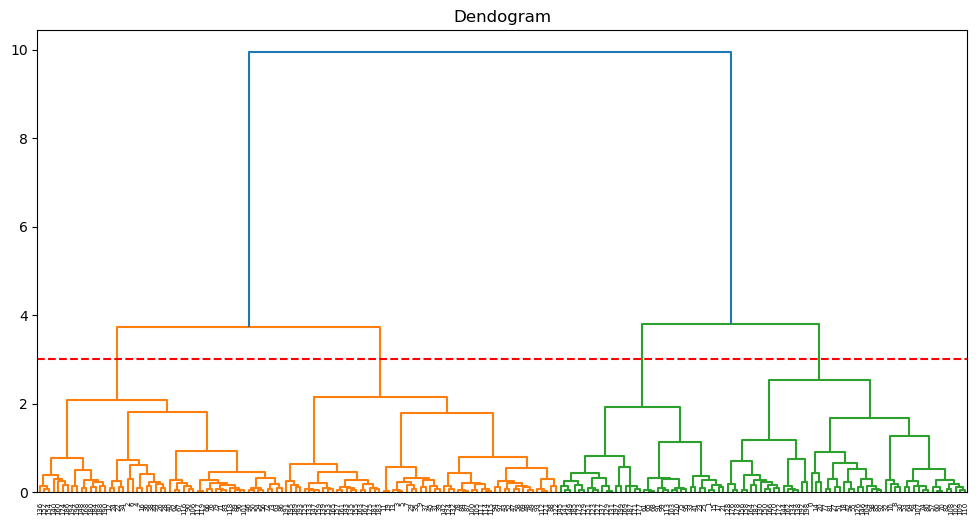

In [64]:
mergings = linkage(X , method = 'ward')
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.axhline(y = 3,color='r',linestyle='--')
plt.title('Dendogram')
plt.show()

In [67]:
aggclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage ='ward')
aggclust.fit(X)

#label data
df_agg = df.copy()
df_agg['Clusters'] = aggclust.labels_
df_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
